In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def dataload(path):
    input_data = open(path, 'r')
    mat=[]

    for rows in input_data:
        row = rows.strip('\n').split('\t')
        row_int = [int(i) for i in row[:-1]]
        mat.append(row_int)

    input_data.close()
    img = np.array(mat[:-1])
    print(f'load:{path}')
    return img

In [4]:
# Distribution of gap without boundary
def dist(img_th):
    # Time direction 
    t_dist = []
    for t in img_th:
        c = 0
        b = 0
        for s in t:
            if s == 255 and b == 255:
                c += 1
            elif s == 0 and b == 255:
                t_dist.append(c)
                b = 0
            elif s == 255 and b == 0:
                b = 255
                c = 1
    
    # Spatial direction 
    s_dist = []
    for t in img_th.T:
        c = 0
        b = 0
        for s in t:
            if s == 255 and b == 255:
                c += 1
            elif s == 0 and b == 255:
                s_dist.append(c)
                b = 0
            elif s == 255 and b == 0:
                b = 255
                c = 1
    return t_dist, s_dist

In [5]:
def remove_small_components(image, area_threshold):

    # Label Connected components of black area
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(255-image.astype(np.uint8), connectivity=4)

    # Create white image
    new_binary_image = np.ones(image.shape, dtype=np.uint8) * 255

    # Add connected components whose area is larger than threshold
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area >= area_threshold:
            new_binary_image[labels == i] = 0

    return new_binary_image

In [ ]:
image_path = "./output.dat"
area_threshold = 30

img = dataload(image_path)
img_th = remove_small_components(img,area_threshold)

t_dist, s_dist = dist(img_th)

t_dist = np.array(t_dist)
s_dist = np.array(s_dist)

In [13]:
t_hist, t_bins =np.histogram(t_dist,bins=np.linspace(1,3001,3001))
s_hist, s_bins = np.histogram(s_dist,bins=np.linspace(10,50011,50001))

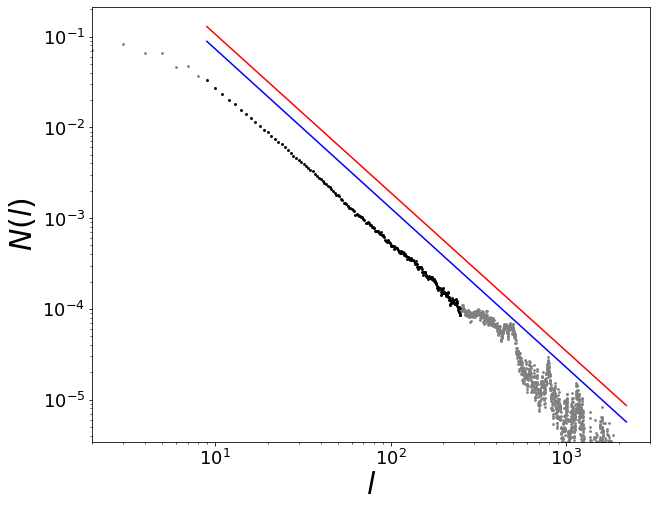

In [32]:
#Time direction
lx=[i*11+9 for i in range(200)]
ly=[6*(i*11+9)**(-1.748) for i in range(200)]
lxd=[i*11+9 for i in range(200)]
lyd=[4.2*(i*11+9)**(-1.756) for i in range(200)]
plt.figure(figsize=(10, 8))

plt.scatter(t_bins[1:-2],t_hist[1:-1]/len(t_dist), zorder=2, color="gray", s=3)
plt.scatter(t_bins[8:250],t_hist[8:250]/len(t_dist), zorder=3, color="k", s=3)

plt.xscale("log")
plt.yscale("log")
plt.plot(lx,ly,color='r', zorder=1)
plt.plot(lxd,lyd,color='b', zorder=2)
plt.xlim(2,3000)
plt.xlabel('$l$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.ylabel('$N(l)$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.tick_params(axis='both', labelsize=18)

plt.savefig("model_space.pdf")

plt.show()

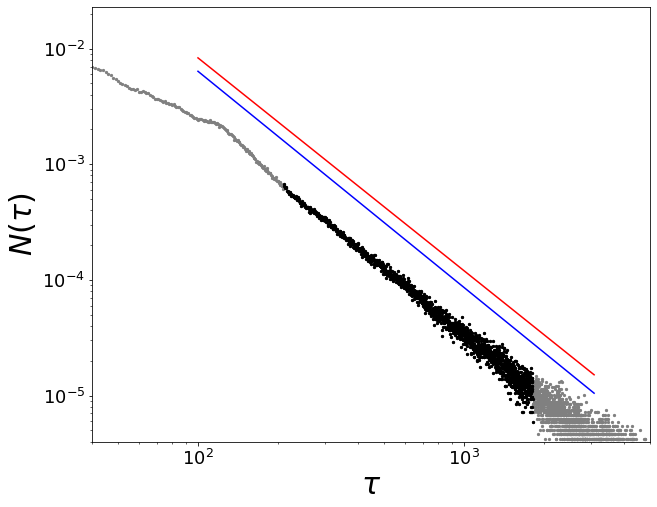

In [34]:
# Spatial direction
lx=[20*i+100 for i in range(150)]
ly=[40*(20*i+100)**(-1.841) for i in range(150)]
lxd=[20*i+100 for i in range(150)]
lyd=[35*(20*i+100)**(-1.870) for i in range(150)]

plt.figure(figsize=(10, 8))

plt.scatter(s_bins[1:-1],s_hist[1:]/len(s_dist), zorder=2,color="gray", s=3)
plt.scatter(s_bins[200:1800],s_hist[200:1800]/len(s_dist), zorder=3, color = "k", s=3)

plt.xscale("log")
plt.yscale("log")
plt.plot(lx,ly,color='r', zorder=1)
plt.plot(lxd,lyd,color='b', zorder=1)

plt.xlim(40,5000)
plt.xlabel('$\\tau$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.ylabel('$N(\\tau)$',fontsize=30,fontstyle='italic', fontfamily='serif', fontname='Times New Roman')
plt.tick_params(axis='both', labelsize=18)

plt.savefig("model_time.pdf")

plt.show()